#LAB 3
**Leng Her**

**INET 4061**

**September 25, 2022**

# Overview



> In order to understand whether there is any statistical difference between age and race on voting, we will be conducting a statistical data anaylsis. The resultant data was analysed using a one-way ANOVA test. A one-way ANOVA test is a test that determines whether the means of at least two populations are different (Frost, J.). To conduct a one-way ANOVA test we need a continous dependent variable as well as a catrgorical independent variable for a comparison of groups (Frost, J.). When conducting an ANOVA test we perform an F-test giving a(n) F -value which evaluates mean variances using an F- statistic ratio: F = between-groups variance / within-group variiance (Frost, J.). With the ANOVA test we also assume a few things: the dependent variable is cotinuous, we have at least one categorical independent variable, the observations are independent, the groups have roughly equal variances, and teh data in the groups follow a normal distribution (Frost, J.). Later, we also use the Bonferroni correction and Tukey's test for data analysis. The Bonferroni correction is a method to counteract multiple comparisons problem (Wikimedia Foundation). The Tukey's test is used to access the significance of differences between pairs of group means (Post hoc tests – tukey HSD. bioSTTS).








Direct Links (References are at the bottom of Lab): 

https://statisticsbyjim.com/anova/

http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html

https://www.w3schools.com/python/pandas/ref_df_describe.asp

https://statisticsbyjim.com/anova/ 

 https://statisticsbyjim.com/anova/f-tests-anova/

https://en.wikipedia.org/wiki/Bonferroni_correction

https://passel2.unl.edu/view/lesson/2e09f0055f13/14

https://biostats.w.uib.no/post-hoc-tests-tukey-hsd/


#Data

> The data method was taken from this site (http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html) containing two data sets. Both datasets values were randomly generated using numpy random. To get the data to show use the print function: print(variable) where variable is a dataframe or object. More information on the data can be found from the link above.


In [ ]:
#Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#First dataset
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race1 = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age1 = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame1 = pd.DataFrame({"race":voter_race1,"age":voter_age1})
groups1 = voter_frame1.groupby("race").groups

# Etract individual groups
asian1 = voter_age1[groups1["asian"]]
black1 = voter_age1[groups1["black"]]
hispanic1 = voter_age1[groups1["hispanic"]]
other1 = voter_age1[groups1["other"]]
white1 = voter_age1[groups1["white"]]

print(voter_frame1)
#print(voter_age1)
#print(voter_race1)

         race  age
0       black   51
1       white   49
2    hispanic   51
3       white   48
4       asian   56
..        ...  ...
995     white   47
996     asian   40
997     white   50
998     white   51
999  hispanic   43

[1000 rows x 2 columns]


In [ ]:
##Second Dataset ANOVA with group means differ

np.random.seed(12)

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

# Use a different distribution for white ages
white_ages = stats.poisson.rvs(loc=18, 
                              mu=32,
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

voter_age = np.where(voter_race=="white", white_ages, voter_age)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups   

# Extract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

print(voter_frame)
#print(voter_age)
#print(voter_race)



         race  age
0       black   54
1       white   51
2    hispanic   53
3       white   50
4       asian   51
..        ...  ...
995     white   51
996     asian   45
997     white   51
998     white   45
999  hispanic   56

[1000 rows x 2 columns]


##EDA (Exploratory data analysis)

Race: Asian, Average age: 48
Race: Black, Average age : 47
Race: Hispanic, Average age : 48
Race: Other, Average age : 48
Race: White, Average age : 47



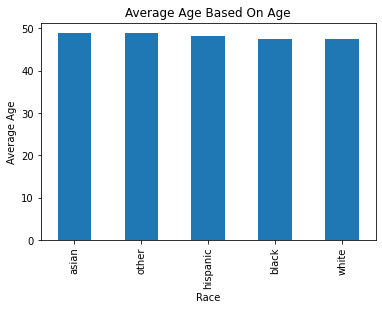

In [ ]:
#For dataset 1 get average age based on races

asian_average = voter_frame1[voter_frame1.race == "asian"].age.mean()#gather average age based on race for the asian sample population. Do same for rest of races
black_average = voter_frame1[voter_frame1.race == "black"].age.mean()
hispanic_average = voter_frame1[voter_frame1.race == "hispanic"].age.mean()
other_average = voter_frame1[voter_frame1.race == "other"].age.mean()
white_average = voter_frame1[voter_frame1.race == "white"].age.mean()

average_dic = {"asian":asian_average,"black":black_average,"hispanic":hispanic_average,"other":other_average,"white":white_average} #store data into a dictionary which will then be turned into a dataframe using pandas

average_df = pd.DataFrame.from_dict(average_dic, orient= 'index') # turn dictionary into a dataframe

sorted_average_df = average_df[0].sort_values(ascending = False) # sort the values

sorted_average_df.plot(kind = 'bar') # create a bar graph

#Labels for the graph
plt.xlabel("Race")
plt.ylabel("Average Age")
plt.title("Average Age Based On Age")



#Print out the findings for close to exact values
print("Race: Asian, Average age: %d" % asian_average)
print("Race: Black, Average age : %d" % black_average)
print("Race: Hispanic, Average age : %d" % hispanic_average)
print("Race: Other, Average age : %d" % other_average)
print("Race: White, Average age : %d\n" % white_average)

Race: Asian, Average age: 48
Race: Black, Average age : 47
Race: Hispanic, Average age : 48
Race: Other, Average age : 47
Race: White, Average age : 50



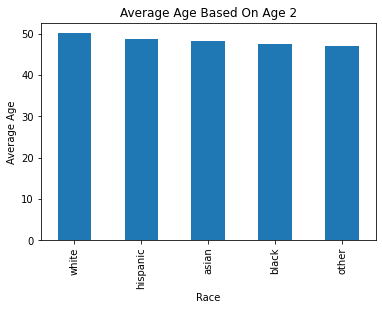

In [ ]:
#For dataset 2, we will apply the same methods as we did for dataset 1
#Refer to comments on dataset 1 for more insight on code

asian_average2 = voter_frame[voter_frame.race == "asian"].age.mean()
black_average2 = voter_frame[voter_frame.race == "black"].age.mean()
hispanic_average2 = voter_frame[voter_frame.race == "hispanic"].age.mean()
other_average2 = voter_frame[voter_frame.race == "other"].age.mean()
white_average2 = voter_frame[voter_frame.race == "white"].age.mean()

average_dic2 = {"asian":asian_average2,"black":black_average2,"hispanic":hispanic_average2,"other":other_average2,"white":white_average2}

average_df2 = pd.DataFrame.from_dict(average_dic2, orient= 'index')

sorted_average_df2 = average_df2[0].sort_values(ascending = False)

sorted_average_df2.plot(kind = 'bar')

plt.xlabel("Race")
plt.ylabel("Average Age")
plt.title("Average Age Based On Age 2")


print("Race: Asian, Average age: %d" % asian_average2)
print("Race: Black, Average age : %d" % black_average2)
print("Race: Hispanic, Average age : %d" % hispanic_average2)
print("Race: Other, Average age : %d" % other_average2)
print("Race: White, Average age : %d\n" % white_average2)

> The above code gives us two bar graphs based on two seperate datasets. The graphs shows the average age based on race. From the graphs, in the first dataset it can be observed that the average age of voters regardless of race tend to be around 47-48 years old. The second dataset also expresses the same with a difference in the white race sample being a little older with the an average age of 50. 

(Note: The title of the graph representing the second dataset is denoted with a 2)

In [ ]:
#For data set 1 get mode based on race then across the whole dataset
asian_mode = voter_frame1[voter_frame1.race == "asian"].age.mode()
black_mode = voter_frame1[voter_frame1.race == "black"].age.mode()
hispanic_mode = voter_frame1[voter_frame1.race == "hispanic"].age.mode()
other_mode = voter_frame1[voter_frame1.race == "other"].age.mode()
white_mode = voter_frame1[voter_frame1.race == "white"].age.mode()


print("Race: Asian, this is the mode based on first dataset: %d" % (asian_mode[0]))
print("Race: Black, this is the mode based on first dataset: %d" % (black_mode[0]))
print("Race: Hispanic, this is the mode based first on dataset: %d" % (hispanic_mode[0]))
print("Race: Other, this is the mode based on first dataset: %d" % (other_mode[0]))
print("Race: White, this is the mode based on first dataset: %d" % (white_mode[0]))




Race: Asian, this is the mode based on first dataset: 54
Race: Black, this is the mode based on first dataset: 45
Race: Hispanic, this is the mode based first on dataset: 45
Race: Other, this is the mode based on first dataset: 45
Race: White, this is the mode based on first dataset: 46


In [ ]:
#For dataset 2 do the same thing as we did for dataset 1
asian_mode2 = voter_frame[voter_frame.race == "asian"].age.mode()
black_mode2 = voter_frame[voter_frame.race == "black"].age.mode()
hispanic_mode2 = voter_frame1[voter_frame.race == "hispanic"].age.mode()
other_mode2 = voter_frame[voter_frame.race == "other"].age.mode()
white_mode2 = voter_frame[voter_frame.race == "white"].age.mode()


print("Race: Asian, this is the mode based on dataset 1: %d" % (asian_mode2[0]))
print("Race: Black, this is the mode based on dataset 1: %d" % (black_mode2[0]))
print("Race: Hispanic, this is the mode based on dataset 1: %d" % (hispanic_mode2[0]))
print("Race: Other, this is the mode based on dataset 1: %d" % (other_mode2[0]))
print("Race: White, this is the mode based on dataset 1: %d" % (white_mode2[0]))

Race: Asian, this is the mode based on dataset 1: 43
Race: Black, this is the mode based on dataset 1: 50
Race: Hispanic, this is the mode based on dataset 1: 45
Race: Other, this is the mode based on dataset 1: 50
Race: White, this is the mode based on dataset 1: 47


> Above we find the mode to denote, what the most occuring age is based on race. For the first dataset we can observe that the most occuring age for all the races other than Asian (54 years old) is around 45-46 years old. This tells us that most Asian voters tend to be a little older than other races. However for the second dataset we notice that the most occuring age tend to be a bit older for all races except for Hispanic. We also note that the second dataset shows that the most occuring race for Asian is 43, vastly different from our findings from the first dataset.

In [ ]:
#Number of people based on race for dataset 1, get percentage

showed_asian = len(voter_frame1[voter_frame1.race == "asian"]) #from the dataframe obtain all occurences of the asian race then count the length, do this for all races
showed_black = len(voter_frame1[voter_frame1.race == "black"])
showed_hispanic = len(voter_frame1[voter_frame1.race == "hispanic"])
showed_other = len(voter_frame1[voter_frame1.race == "other"])
showed_white = len(voter_frame1[voter_frame1.race == "white"])

showed_total = showed_white + showed_other + showed_hispanic + showed_black + showed_asian #total the races: Should be 1000 as it was set in the Data section

per_asian = (showed_asian/showed_total) * 100 #Get percentage for all races
per_black = (showed_black/showed_total) * 100
per_hispanic = (showed_hispanic/showed_total) * 100
per_other = (showed_other/showed_total) * 100
per_white = (showed_white/showed_total) * 100

sym = "%" #initialize symbol for printing

print("Below is the percentages of voters based on race for the first dataset: ") #print results
print("\nRace: Asian, the percentage is: %d%s" % (per_asian,sym))
print("Race: Black, the percentage is: %d%s" % (per_black,sym))
print("Race: Hispanic, the percentage is: %d%s" % (per_hispanic,sym))
print("Race: Other, the percentage is: %d%s" % (per_other,sym))
print("Race: White, the percentage is: %d%s" % (per_white,sym))



Below is the percentages of voters based on race for the first dataset: 

Race: Asian, the percentage is: 4%
Race: Black, the percentage is: 14%
Race: Hispanic, the percentage is: 24%
Race: Other, the percentage is: 5%
Race: White, the percentage is: 51%


In [ ]:
#Number of people based on race for dataset 2, percentage
#Apply same method as we did for first dataset
#Refer to comments on first dataset for more insight

showed_asian2 = len(voter_frame[voter_frame.race == "asian"])
showed_black2 = len(voter_frame[voter_frame.race == "black"])
showed_hispanic2 = len(voter_frame[voter_frame.race == "hispanic"])
showed_other2 = len(voter_frame[voter_frame.race == "other"])
showed_white2 = len(voter_frame[voter_frame.race == "white"])

showed_total2 = showed_white2 + showed_other2 + showed_hispanic2 + showed_black2 + showed_asian2

per_asian2 = (showed_asian2/showed_total2) * 100
per_black2 = (showed_black2/showed_total2) * 100
per_hispanic2 = (showed_hispanic2/showed_total2) * 100
per_other2 = (showed_other2/showed_total2) * 100
per_white2 = (showed_white2/showed_total2) * 100

sym = "%"

print("Below is the percentages of voters based on race for the second dataset: ")
print("\nRace: Asian, the percentage is: %d%s" % (per_asian2,sym))
print("Race: Black, the percentage is: %d%s" % (per_black2,sym))
print("Race: Hispanic, the percentage is: %d%s" % (per_hispanic2,sym))
print("Race: Other, the percentage is: %d%s" % (per_other2,sym))
print("Race: White, the percentage is: %d%s" % (per_white2,sym))



Below is the percentages of voters based on race for the second dataset: 

Race: Asian, the percentage is: 4%
Race: Black, the percentage is: 14%
Race: Hispanic, the percentage is: 24%
Race: Other, the percentage is: 5%
Race: White, the percentage is: 51%


> Above we obtain the percentage of voters based on race. From the results above it can be seen that the majority of voters are of the White race while the least amount being the Asian race. This is true for both datasets.

Note: Percentages can be seen set from the numpy.random() function above in the Data section.

In [ ]:
#Describe data
#Dataset 1
voter_frame1.describe()

,age
count,1000.000000
mean,47.773000
std,5.308074
min,34.000000
25%,44.000000
50%,48.000000
75%,51.000000
max,66.000000


In [ ]:
#Dataset 2
voter_frame.describe()

,age
count,1000.00000
mean,49.14100
std,5.72205
min,29.00000
25%,45.00000
50%,49.00000
75%,53.00000
max,72.00000


> Above we use the describe() function from the pandas module, more insight on the function can be given here: https://www.w3schools.com/python/pandas/ref_df_describe.asp. From the given tables we get statistical values pretaining to both datasets with key differences that can be observed at the minimum and maximum values. Everything else from the data tables are relatively similar.

#Models


In [ ]:
# Perform the ANOVA 
set1 = stats.f_oneway(asian1, black1, hispanic1, other1, white1)
print(set1)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)


> The above code is an ANOVA test performed on the first dataset with the null hyoithesis being no significant difference between the means of each group, while the alternative hypothesis being a significant difference between the means of each group (More info: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html). From the test we can observe that the p-value is greater than the sinificance level of 0.05 therefore we faile to reject the null hypothesis for the first dataset.

From dataset2

In [ ]:
set2 = stats.f_oneway(asian, black, hispanic, other, white)
print(set2)

F_onewayResult(statistic=10.164699828386366, pvalue=4.5613242113994585e-08)


> The above code is also an ANOVA test performed, however for the second data set with the same null hypothesis and alternative hypothesis. From the test we can observe that the p-value is extremely low with a 99% significance level, in which we can reject the null hypothesis.

post-hoc analysis with Bonferroni correction

In [ ]:
#run post-hoc analysis
#perform seperate t-test between all pairs
#go in models
# Get all race pairs
race_pairs = []

for race1 in range(4):
    for race2  in range(race1+1,5):
        race_pairs.append((races[race1], races[race2]))

# Conduct t-test on each pair
for race1, race2 in race_pairs: 
    print(race1, race2)
    print(stats.ttest_ind(voter_age[groups[race1]], 
                          voter_age[groups[race2]]))    

asian black
Ttest_indResult(statistic=0.838644690974798, pvalue=0.4027281369339345)
asian hispanic
Ttest_indResult(statistic=-0.42594691924932293, pvalue=0.6704669004240726)
asian other
Ttest_indResult(statistic=0.9795284739636, pvalue=0.3298877500095151)
asian white
Ttest_indResult(statistic=-2.318108811252288, pvalue=0.020804701566400217)
black hispanic
Ttest_indResult(statistic=-1.9527839210712925, pvalue=0.05156197171952594)
black other
Ttest_indResult(statistic=0.28025754367057176, pvalue=0.7795770111117659)
black white
Ttest_indResult(statistic=-5.379303881281835, pvalue=1.039421216662395e-07)
hispanic other
Ttest_indResult(statistic=1.5853626170340225, pvalue=0.11396630528484335)
hispanic white
Ttest_indResult(statistic=-3.5160312714115376, pvalue=0.0004641298649066684)
other white
Ttest_indResult(statistic=-3.763809322077872, pvalue=0.00018490576317593065)


> In the above code we run a post-hoc analysis to check which groups differ after recieving a postive ANOVA result (Python for Data Analysis Part 26). To conduct this test we do a pairwise t-test for each group (Python for Data Analysis Part 26). From the data above we can observe that some groups have a p-value greater than the significance level while others have lower p-values. This tells us that some groups may reject the null hypothesis while others may not.  

Tukey test

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-0.8032,0.9,-3.4423,1.836,False
asian,hispanic,0.4143,0.9,-2.1011,2.9297,False
asian,other,-1.0645,0.8852,-4.2391,2.11,False
asian,white,1.9547,0.175,-0.4575,4.3668,False
black,hispanic,1.2175,0.2318,-0.386,2.821,False
black,other,-0.2614,0.9,-2.7757,2.253,False
black,white,2.7579,0.001,1.3217,4.194,True
hispanic,other,-1.4789,0.4391,-3.863,0.9053,False
hispanic,white,1.5404,0.004,0.3468,2.734,True
other,white,3.0192,0.0028,0.7443,5.2941,True


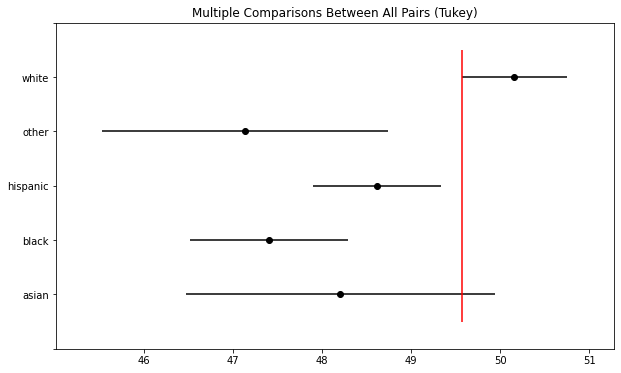

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=voter_age,     # Data
                          groups=voter_race,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

> Above we run another post-hoc test, however in this case we use the Bonferroni correction. The Bonferroni correction is used in the case that we may end up rejecting results that are actually significant (Python for Data Analysis Part 26: Analysis of variance (ANOVA)). The Bonferroni correction has us adjust for a multiple comparison problem by dividing the significance level by the number of comparisons (Python for Data Analysis Part 26: Analysis of variance (ANOVA)). We also use another post-hoc test, the Tukey's test which access the significance of differences between pairs of group means (Post hoc tests – tukey HSD. bioSTTS).

> Our resulting data after the Bonferroni correction and Tukey test show us whether we should reject the null hypothesis for each pair of groups (Python for Data Analysis Part 26). This is also represented in the graph.

#Conclusions

> Overall, in this lab we used ANOVA analysis to describe the average age of voters across a given group from our data. From our first resultant data, we can conclude that there is not a significance mean of variances thus failing to reject the null hypothesis. However, in the second dataset the resultant data shows us that we reject the null hypothesis for 3 pairs each including the "white" category (Python for Data Analysis Part 26). Because the "white" category is included all 3 instances of which we reject the null hypothesis, it can be infered that the white group is likely to be different from the others. We also found that one other group overlaps with the white group's confidence interval which can be observed from the graph (Python for Data Analysis Part 26). 

#Refernces

1. Frost, J. (n.d.). ANOVA Archives. Statistics By Jim. Retrieved September 24, 2022, from https://statisticsbyjim.com/anova/ 

2. Python for Data Analysis Part 26: Analysis of variance (ANOVA). Life Is Study. (n.d.). Retrieved September 25, 2022, from http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16_23.html 

3. Pandas DataFrame describe() Method. Pandas dataframe describe() method. (n.d.). Retrieved September 25, 2022, from https://www.w3schools.com/python/pandas/ref_df_describe.asp 

4. Frost, J. (2022, May 19). How F-tests work in analysis of variance (ANOVA). Statistics By Jim. Retrieved September 25, 2022, from https://statisticsbyjim.com/anova/f-tests-anova/ 

5. Frost, J. (n.d.). ANOVA Archives. Statistics By Jim. Retrieved September 25, 2022, from https://statisticsbyjim.com/anova/ 

6. Wikimedia Foundation. (2022, August 31). Bonferroni correction. Wikipedia. Retrieved September 25, 2022, from https://en.wikipedia.org/wiki/Bonferroni_correction 

7. Part 2: Statistical analysis and modeling. passel. (n.d.). Retrieved September 25, 2022, from https://passel2.unl.edu/view/lesson/2e09f0055f13/14 

8. Post hoc tests – tukey HSD. bioSTTS. (n.d.). Retrieved September 25, 2022, from https://biostats.w.uib.no/post-hoc-tests-tukey-hsd/ 

In [3]:
!jupyter nbconvert --to HTML "Lab10.ipynb"

[NbConvertApp] Converting notebook Lab10.ipynb to HTML
[NbConvertApp] Writing 1066806 bytes to Lab10.html
